# Neural Network

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [10]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 1.10674443],
       [ 1.34691702],
       [ 0.44978512],
       [-0.00420475],
       [-0.15241734],
       [ 1.42148973],
       [-0.46423784],
       [-0.18940988],
       [ 0.32776735],
       [ 1.10627328],
       [ 0.17146337],
       [-0.12429127],
       [ 0.15846383],
       [ 0.87574098],
       [ 0.87319628],
       [ 0.17035447],
       [ 0.4360519 ],
       [ 1.49234535],
       [ 0.62686468],
       [-0.49563439],
       [-0.25503022],
       [-0.0875795 ],
       [-0.11778354],
       [ 0.32312372],
       [ 0.46387512],
       [ 0.43660142],
       [ 1.08614537],
       [ 0.94367315],
       [ 1.036918  ],
       [ 1.41527531],
       [-0.1519695 ],
       [ 1.52355001],
       [ 0.17248648],
       [-0.41495367],
       [-0.42761154],
       [ 0.10970011],
       [ 0.24402604],
       [ 1.51029337],
       [ 0.93403087],
       [ 1.0947167 ],
       [ 0.69010032],
       [-0.12494261],
       [ 1.31843183],
       [ 0.02107354],
       [ 0.38440385],
       [ 1

In [11]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.85674443],
       [2.09691702],
       [1.19978512],
       [0.74579525],
       [0.59758266],
       [2.17148973],
       [0.28576216],
       [0.56059012],
       [1.07776735],
       [1.85627328],
       [0.92146337],
       [0.62570873],
       [0.90846383],
       [1.62574098],
       [1.62319628],
       [0.92035447],
       [1.1860519 ],
       [2.24234535],
       [1.37686468],
       [0.25436561],
       [0.49496978],
       [0.6624205 ],
       [0.63221646],
       [1.07312372],
       [1.21387512],
       [1.18660142],
       [1.83614537],
       [1.69367315],
       [1.786918  ],
       [2.16527531],
       [0.5980305 ],
       [2.27355001],
       [0.92248648],
       [0.33504633],
       [0.32238846],
       [0.85970011],
       [0.99402604],
       [2.26029337],
       [1.68403087],
       [1.8447167 ],
       [1.44010032],
       [0.62505739],
       [2.06843183],
       [0.77107354],
       [1.13440385],
       [1.90884185],
       [1.09527048],
       [1.005

In [12]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.39424631],
       [1.47504353],
       [0.93477204],
       [0.49579526],
       [0.34817211],
       [1.48887446],
       [0.05225856],
       [0.31172064],
       [0.82193004],
       [1.39403534],
       [0.67062444],
       [0.3760285 ],
       [0.65780147],
       [1.26801826],
       [1.26638608],
       [0.6695317 ],
       [0.9223641 ],
       [1.4969243 ],
       [1.08660844],
       [0.0244102 ],
       [0.24772535],
       [0.41253242],
       [0.3824886 ],
       [0.81753016],
       [0.94741707],
       [0.92286214],
       [1.38483762],
       [1.30971903],
       [1.36083996],
       [1.48793096],
       [0.34861477],
       [1.4988841 ],
       [0.67163246],
       [0.09685246],
       [0.08530142],
       [0.60948022],
       [0.74161134],
       [1.49817025],
       [1.30402321],
       [1.38879845],
       [1.13661455],
       [0.3753822 ],
       [1.46832473],
       [0.52107198],
       [0.87500656],
       [1.41634   ],
       [0.83845121],
       [0.752

Imitation of formula 'x+0.75'
Weight_1:1.3414504296549434
Weight_2:1.3067809967061041
Bias:0.0845965317083665


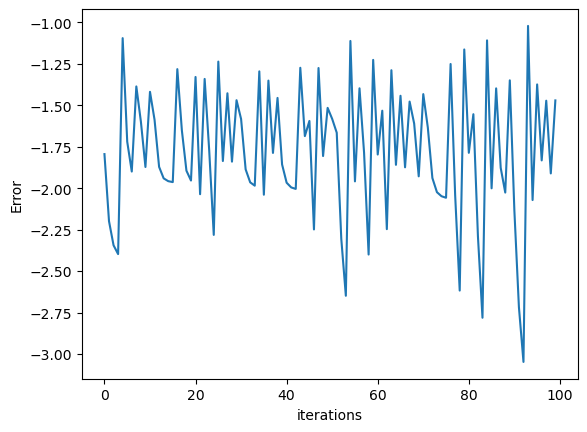

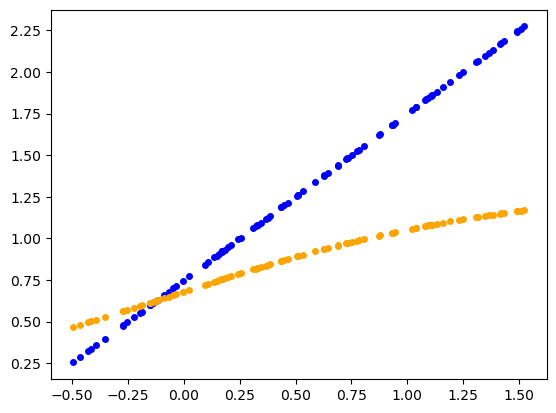


Imitation of formula 'sin(x)+0.5'
Weight_1:1.5915168230732997
Weight_2:0.9462501933828018
Bias:-0.287621902175804


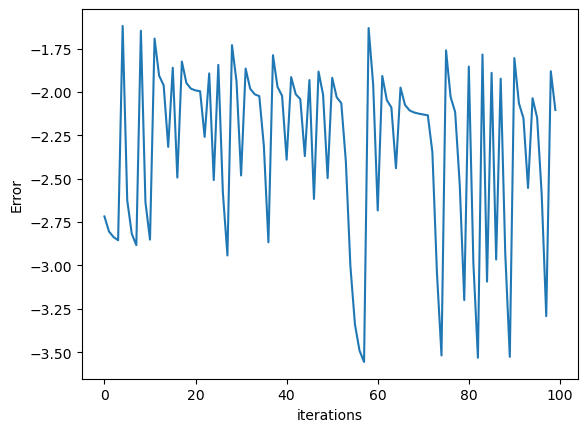

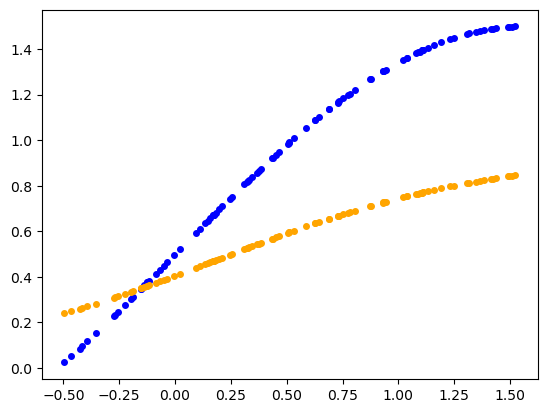

In [14]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 
        self.y          = 0.0 
        
        # Parameters to be learned
        self.weight_1   = 1.0 
        self.weight_2   = 1.0
        self.bias       = 1.0 
        
        # State information
        self.hidden     = 0.0 
        self.output     = 0.0 
        self.error      = 0.0 
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # Feed-forward pass
    # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2
    def feed_forward(self):
        hidden_layer = self.X*self.weight_1+self.bias
        self.hidden = 1/(1 + np.exp(-hidden_layer))
        self.output = self.hidden*self.weight_2   
        self.error = 0.5*((self.y-self.output)*(self.y-self.output)) # Loss Function
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2     
      
    # (b) Back-propagation pass
    def back_prop(self):
                    
        hid = self.hidden
        w1 = self.X
        w2 = self.weight_2
        h = self.hidden * (1-self.hidden)
        out =  (self.output-self.y)
        dw2 = out*hid
        dxbias = out*h*hid*1
        dw1 = out*w2*h*w1
        
        alpha = 0.01
        
        self.weight_1 -= alpha*dw1
        self.weight_2 -= alpha*dw2
        self.bias -= alpha*dxbias 
        

def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()                   # nn = NeuralNetwork() 
    # Collect mean error of each epoch to plot it later
    iteration_error = []
    data =  [X,y]

    # Perform multiple epochs, aka inputting the dataset multiple times
    for iterations in range(0,100):
        error = 0.0
        np.random.shuffle(data)
        for i in range(len(X)):
            nn.set_sample(data[0][i], data[1][i])          # nn.setsample(2,5)
            nn.feed_forward()            # nn.feed_forward() # perform feed-forward to calculate output
            nn.back_prop()               # nn.back_prop() # use difference between target and actual output to update parameters
            error += nn.error         
                                         #Remember final error of each iteration in "iteration_error"
            
        iteration_error.append(error/len(X))

        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot iteration errors with logarithmic transformation
    plt.plot(list(range(len(iteration_error))), np.log(iteration_error))
    ax = plt.gca()
    ax.set_xlabel('iterations')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(
        X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='orange', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)